In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score
from sklearn.datasets import make_blobs

from warnings import filterwarnings
filterwarnings("ignore")

# EDA анализ

In [92]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [93]:
first_df = pd.DataFrame(X, columns=["x", "y"])
first_df.head()

,x,y
0,-5.198113,0.641869
1,-5.752295,0.418627
2,-10.844898,-7.553523
3,-4.570985,-0.801017
4,-3.519162,0.039345


In [94]:
first_df.describe()

,x,y
count,1500.000000,1500.000000
mean,-3.861508,-1.681941
std,4.568553,2.858301
min,-11.595696,-8.812245
25%,-8.220405,-4.795178
50%,-4.569659,-0.450614
75%,1.275753,0.515099
max,5.676767,3.298728


(array([[ 24.,  67., 142., 156.,  97.,  25.,  67., 141., 164.,  90.,  24.,
           3.,   4.,  28., 109., 185., 117.,  49.,   6.,   2.],
        [  0.,   0.,   0.,   2.,  12.,  71., 153., 159.,  85.,  17.,   9.,
          55., 212., 341., 260., 100.,  23.,   1.,   0.,   0.]]),
 array([-11.59569637, -10.7320732 ,  -9.86845003,  -9.00482686,
         -8.14120369,  -7.27758052,  -6.41395735,  -5.55033418,
         -4.68671101,  -3.82308784,  -2.95946467,  -2.0958415 ,
         -1.23221833,  -0.36859516,   0.49502801,   1.35865118,
          2.22227435,   3.08589752,   3.94952069,   4.81314386,
          5.67676703]),
 <a list of 2 BarContainer objects>)

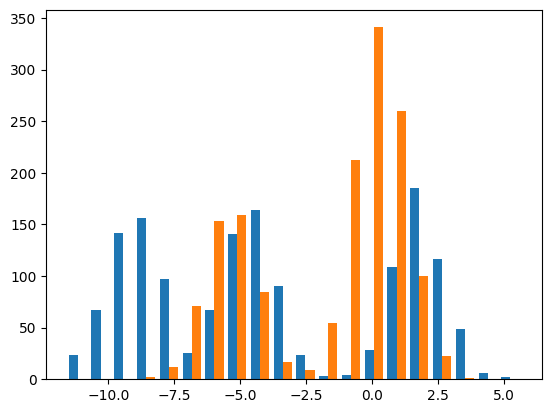

In [95]:
plt.hist(first_df, bins=20)

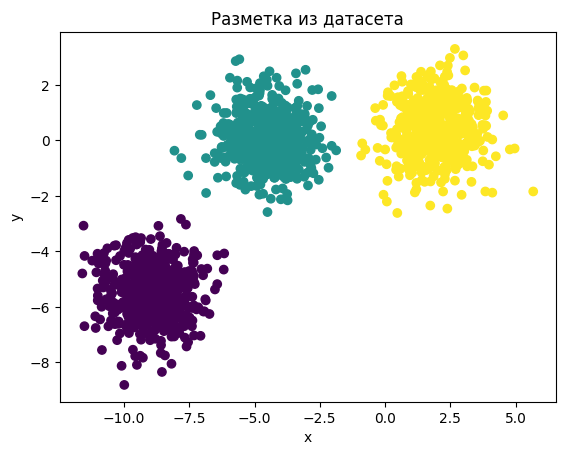

In [96]:
plt.scatter(first_df["x"], first_df["y"], c=y)
plt.title("Разметка из датасета")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Определение оптимального числа кластера по BIC и методу локтя

Оптимум по bic 3


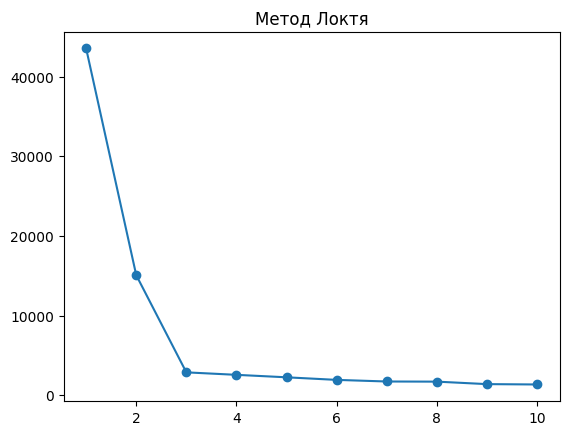

In [97]:
max_clusters = 10
MG_criteria = {}

for i in range(1, max_clusters+1):
    GM_model = GaussianMixture(n_components=i, random_state=random_state)
    GM_model.fit(first_df)
    bic = GM_model.bic(first_df)
    MG_criteria[i] = bic

print("Оптимум по bic", np.array(list(MG_criteria.values())).argmin()+1)

inertias = {}
for i in range(1, max_clusters+1):
    KM_model = KMeans(n_clusters=i, random_state=random_state)
    KM_model.fit(first_df)
    inertias[i] = KM_model.inertia_

plt.title("Метод Локтя")
plt.plot(inertias.keys(), inertias.values())
plt.scatter(inertias.keys(), inertias.values())
plt.show()

### Выводы

По методу локтя и расчету BIC видно, что оптимальным количеством кластеров будет знаечние `3`

# Функция для сравнения 2х методов кластеризации

In [98]:
def compare_km_and_gm_by_dataset(X, y, n_cluster, random_state=random_state):
    # GM
    GM_model = GaussianMixture(n_components=n_cluster, random_state=random_state)
    gm_predict = GM_model.fit_predict(X)
    # KM
    KM_model = KMeans(n_clusters=n_cluster, random_state=random_state)
    km_predict = KM_model.fit_predict(X)
    # вывод метрик в std out
    titles = ["y_true", "GaussianMixture predict", "KMeans predict"]
    predicts = [y, gm_predict, km_predict]
    for i in range(2):
        currnt_algorithm = titles[i+1].split()[0]
        curent_predict =  predicts[i+1]
        print(f"algorithm: {currnt_algorithm}")
        print(f"adjusted_rand_score={adjusted_rand_score(labels_true=y, labels_pred=curent_predict)}")
        print(f"rand_score={rand_score(labels_true=y, labels_pred=curent_predict)}")
        print(f"silhouette_score={silhouette_score(X=X, labels=curent_predict)}")
        print("-" * 30)

    _, axs = plt.subplots(1, n_cluster, figsize=(12, 3))
    for i in range(n_cluster):
        axs[i].set_title(titles[i])
        axs[i].scatter(X[:, 0], X[:, 1], c=predicts[i])
        # для kmeans отрисую центройды
        if i == n_cluster-1:
            plt.scatter(KM_model.cluster_centers_[:,0], KM_model.cluster_centers_[:,1], s = 150, c = 'black', marker = '^', label = 'KM Centroids')
        axs[i].legend()
    plt.tight_layout()
    plt.show()
    plt.title("distribution")
    plt.hist(X, bins=20)
    plt.show()

# Датасет #1

algorithm: GaussianMixture
adjusted_rand_score=1.0
rand_score=1.0
silhouette_score=0.7333423486262539
------------------------------
algorithm: KMeans
adjusted_rand_score=1.0
rand_score=1.0
silhouette_score=0.7333423486262539
------------------------------


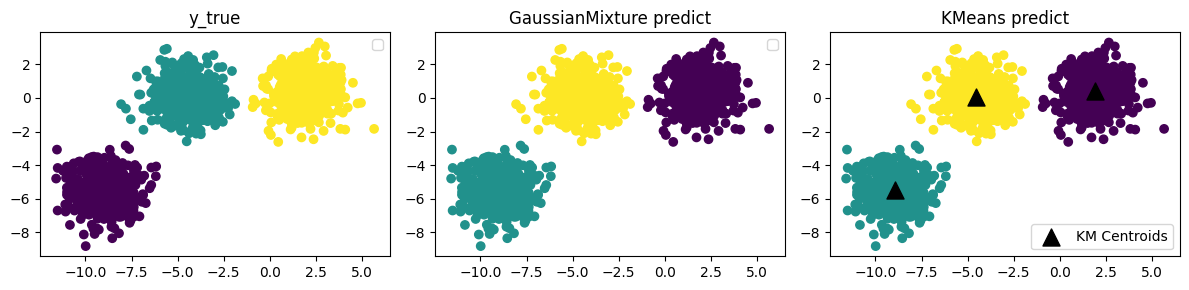

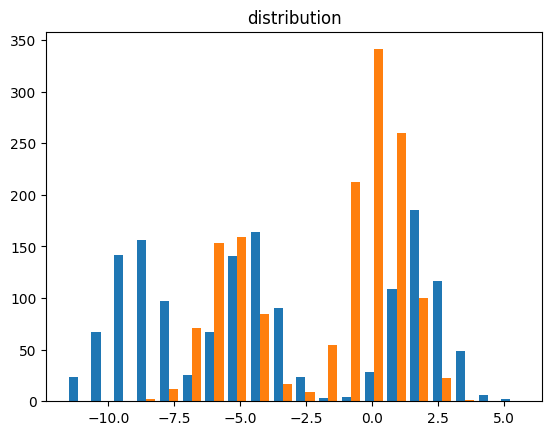

In [99]:
compare_km_and_gm_by_dataset(X, y, 3)

На "идеальных" данных оба алгоритма справились хорошо

# Датасет #2

algorithm: GaussianMixture
adjusted_rand_score=1.0
rand_score=1.0
silhouette_score=0.4769285484691789
------------------------------
algorithm: KMeans
adjusted_rand_score=0.6127304063332577
rand_score=0.8279839893262175
silhouette_score=0.5100014905196579
------------------------------


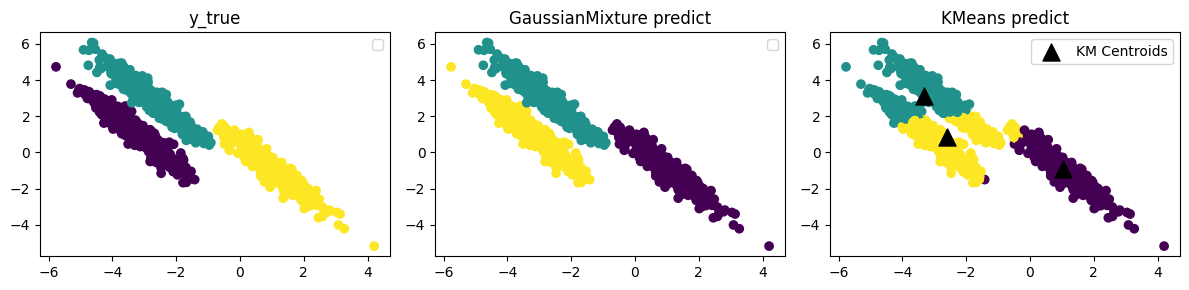

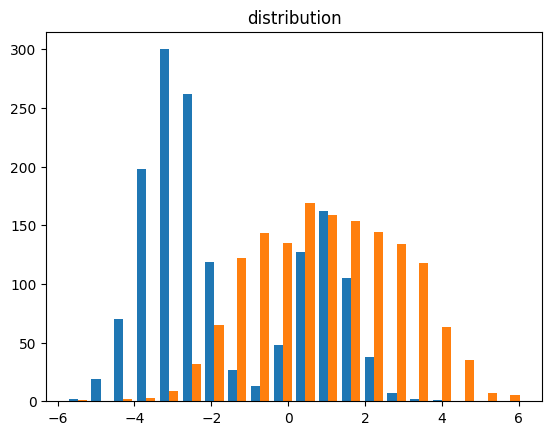

In [100]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
compare_km_and_gm_by_dataset(X_aniso, y, 3)

Данные потеряли сферический вид. GaussianMixture справился все так же идеально (метрики 1 и 1), KMeans инициализировал центройды не в тех местах, из-за чего показал себя сильно хуже

# Датасет #3

algorithm: GaussianMixture
adjusted_rand_score=0.966393588375995
rand_score=0.9850736046253058
silhouette_score=0.6193433949931887
------------------------------
algorithm: KMeans
adjusted_rand_score=0.8298019968970524
rand_score=0.9240711585501445
silhouette_score=0.6469266330302315
------------------------------


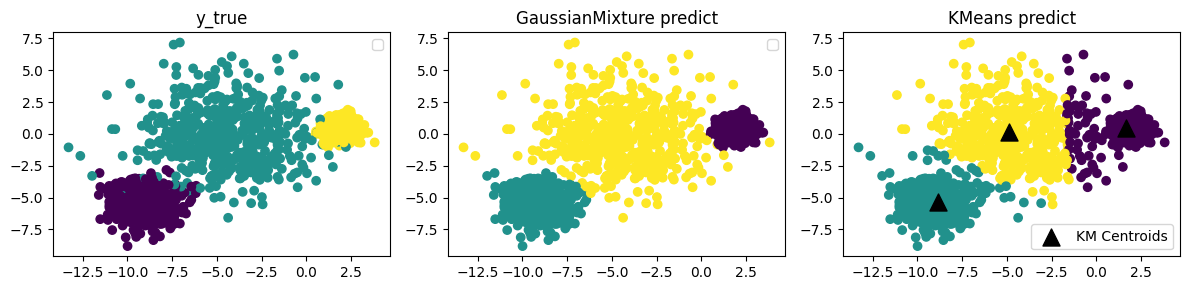

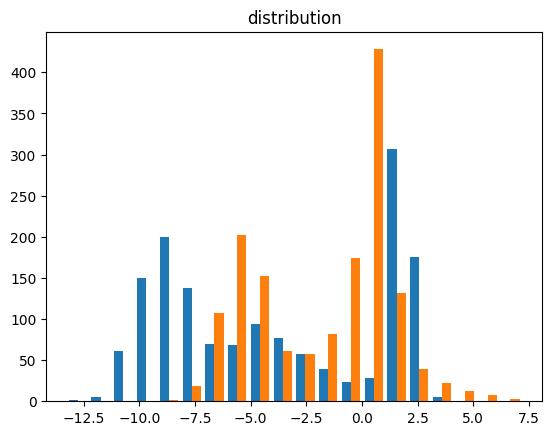

In [101]:
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
compare_km_and_gm_by_dataset(X_varied, y_varied, 3)

GaussianMixture уже не идеально, но все же очень хорошо справился с задачей (adjusted_rand_score=0.966393588375995). KMeans попытался поставить центройды максимально эффективно и отдаленно друг от друга, из-за чего правый крастер захватил слишком много ложных точек

# Датасет #4

In [102]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_filtered = np.hstack((y[y==0][:500], y[y==1][:100], y[y==2][:10]))
X_filtered.shape, y_filtered.shape

((610, 2), (610,))

algorithm: GaussianMixture
adjusted_rand_score=0.38528987342013604
rand_score=0.6609814530673773
silhouette_score=0.3777374276170661
------------------------------
algorithm: KMeans
adjusted_rand_score=0.38212936903571326
rand_score=0.658671835042666
silhouette_score=0.37713889086766944
------------------------------


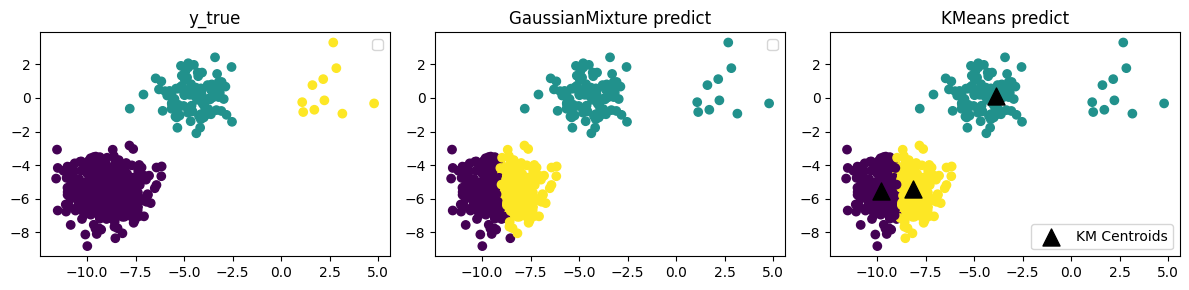

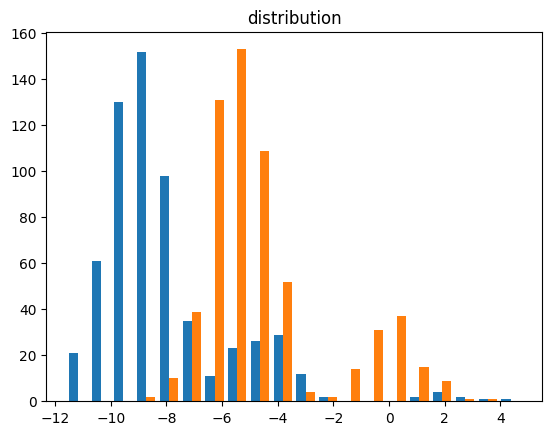

In [103]:
compare_km_and_gm_by_dataset(X_filtered, y_filtered, 3)

Оба алгоритма справились плохо. На примере данного датасета GM видит 1 хорошую разделяющую линию для таких данных, думаю он бы смог вернее кластеризовать на 2 класстера, а для KMeans главная задача - делать кластеры как можно "круглее" и компактнее. Его не волнует, сколько точек в каждом кластере, лишь бы сумма квадратов расстояний была минимальна. Мне кажется, что на таком датасете лучше бы себя показал DBSCAN

# Общие выводы

KMeans хорошо справляется с данными сферической формы, и одинаковым "размер" кластеров. Но Gaussing Mixture показывает себя не хуже, а то и лучше в таких же условиях, а так же лучше справляется с кластерами разной плотности, другими формама, что делает его пригодным для анализа не очевидных форм